In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# load the training dataset
wine=pd.read_csv('/content/wine.csv')

In [3]:
wine


,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [4]:
wine.isnull().sum()

Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64

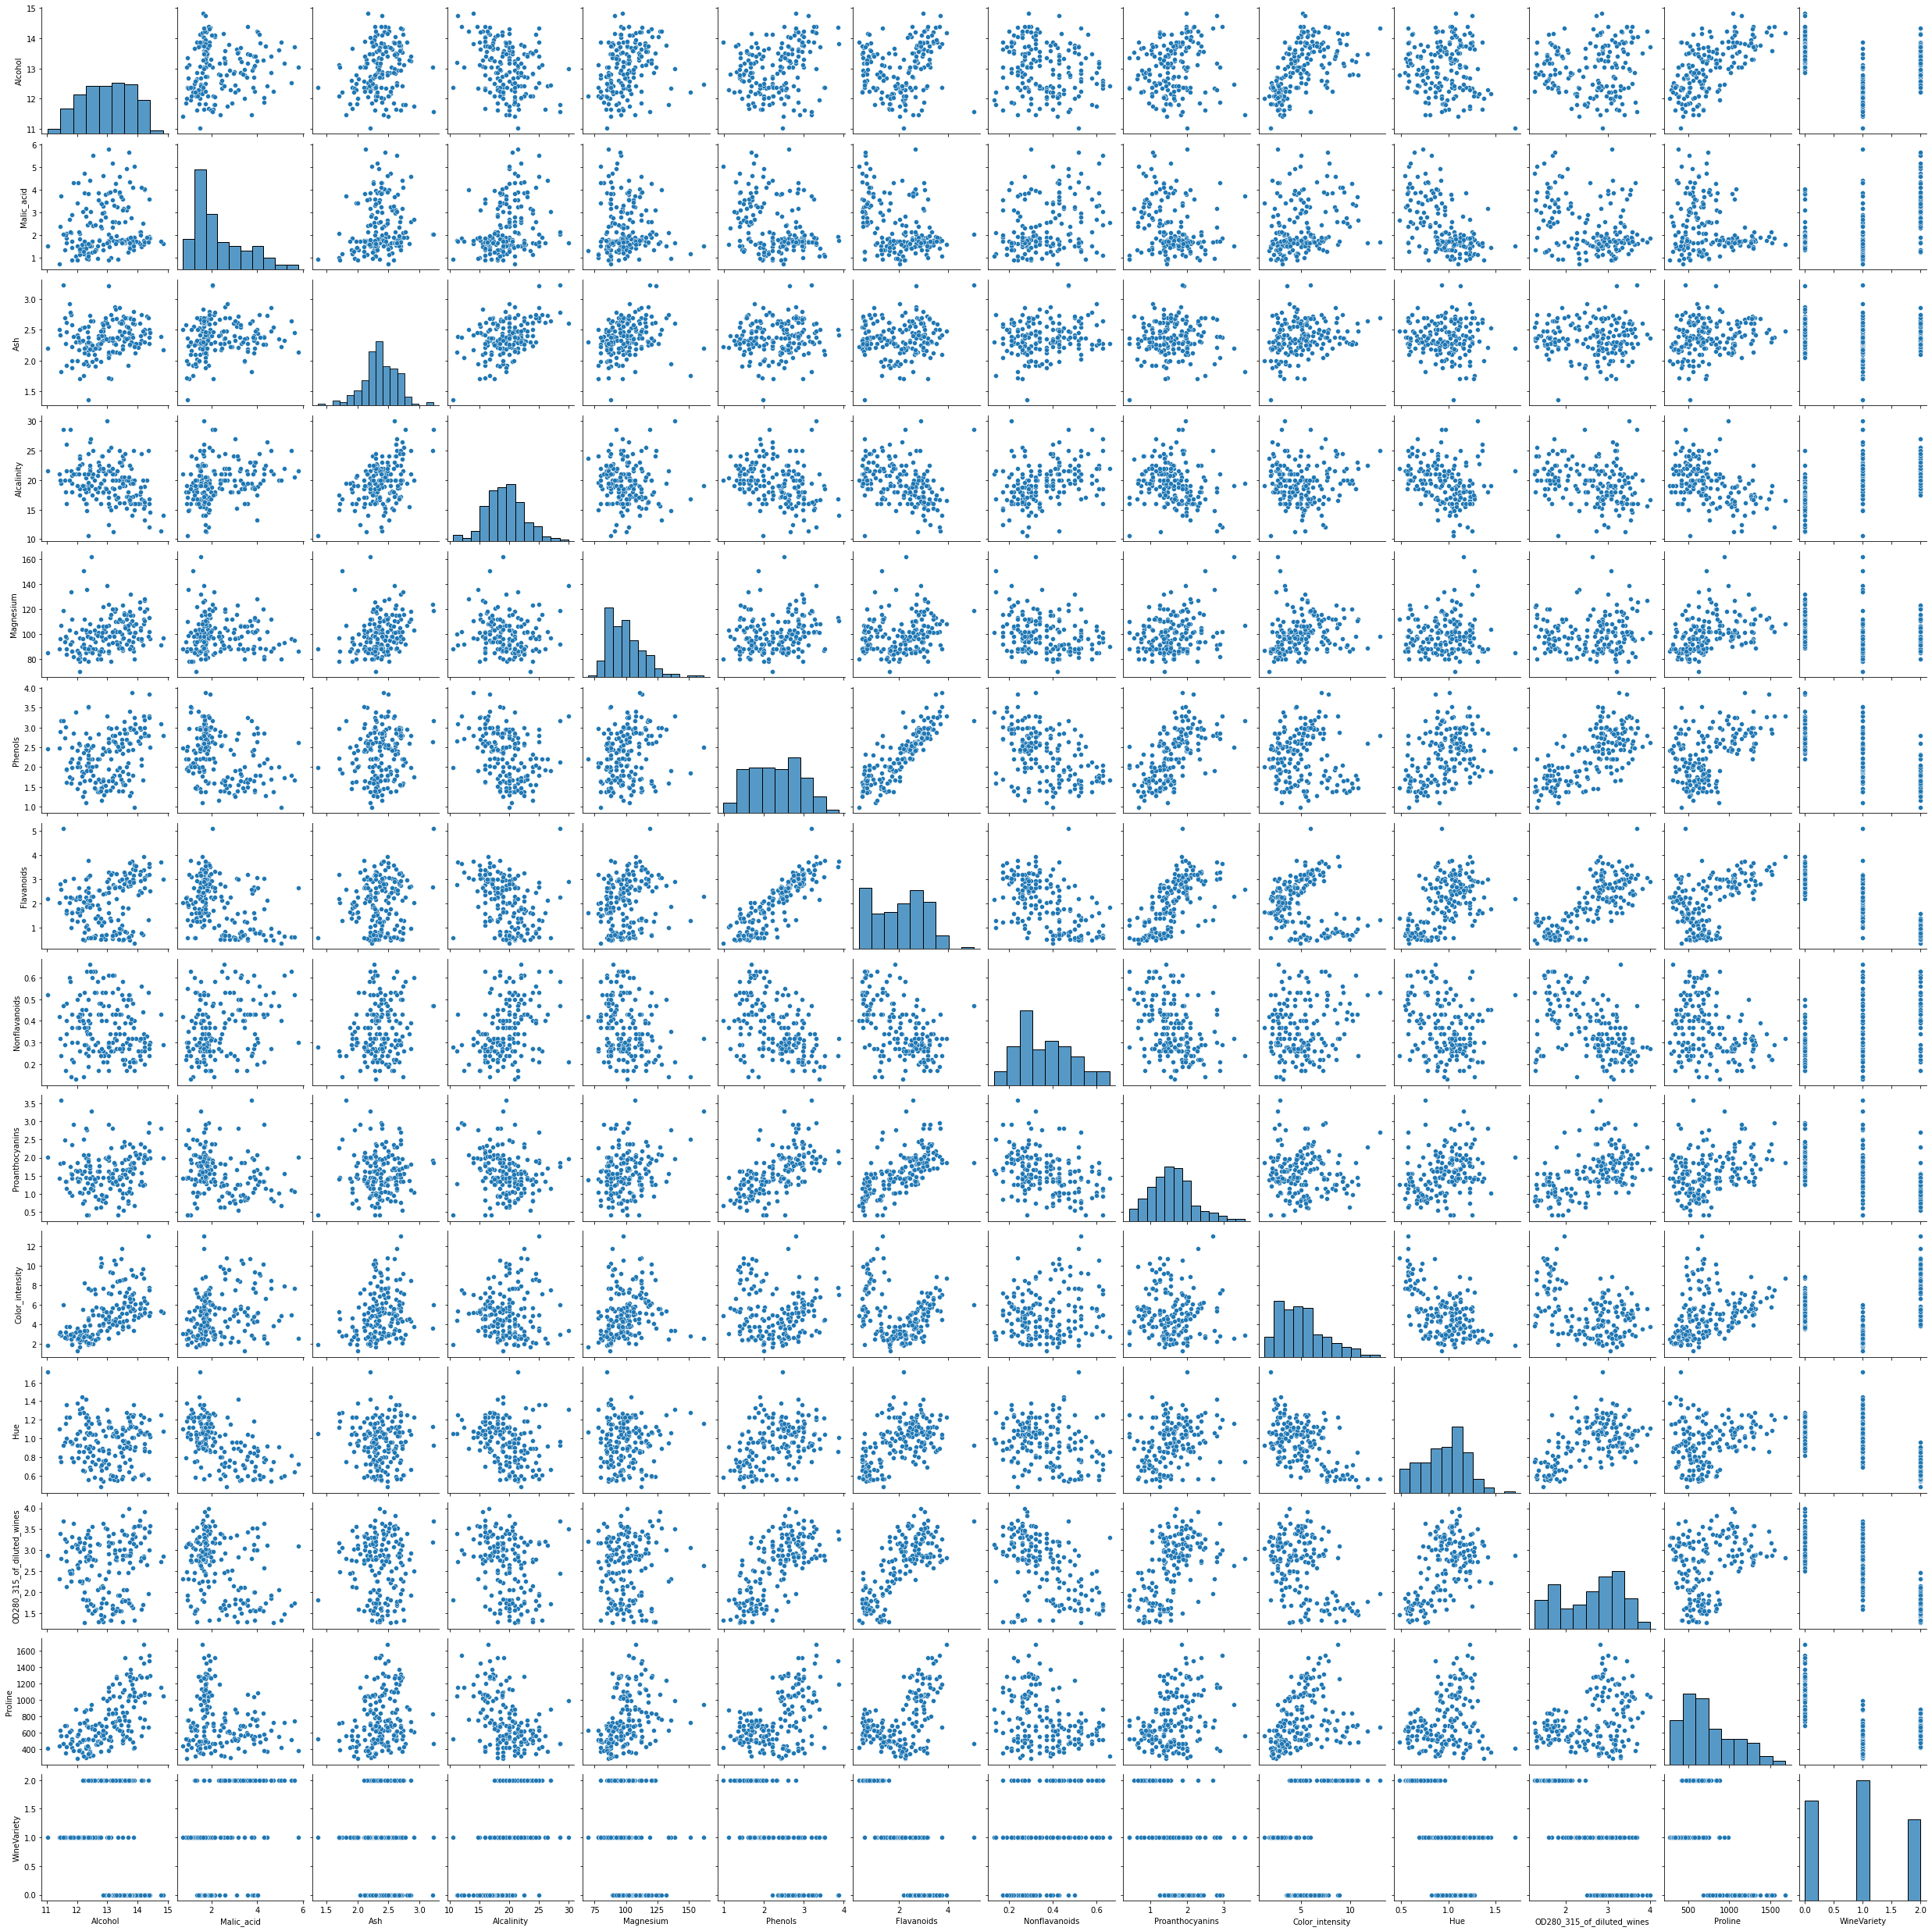

In [5]:
label='WineVariety'
sns.pairplot(wine)

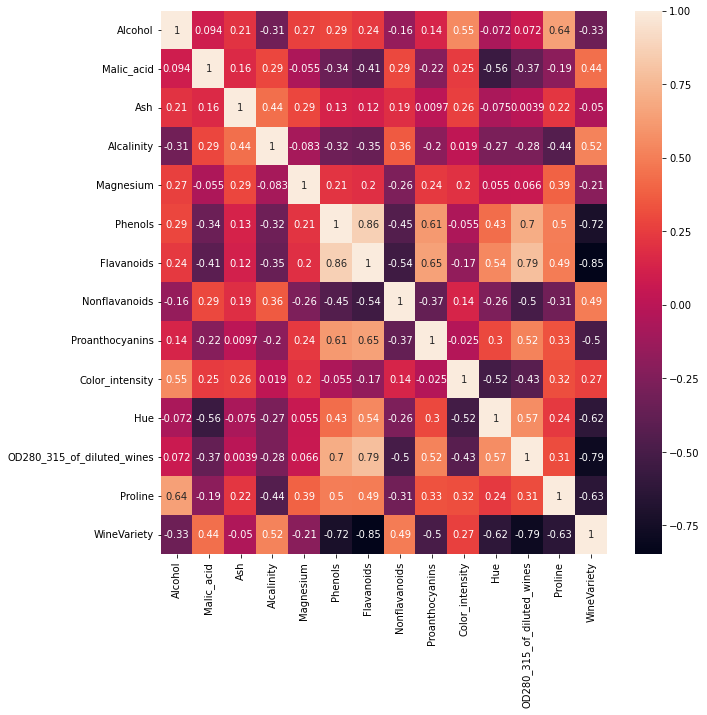

In [6]:
plt.figure(figsize= (10,10))
sns.heatmap(wine.corr(),annot=True)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

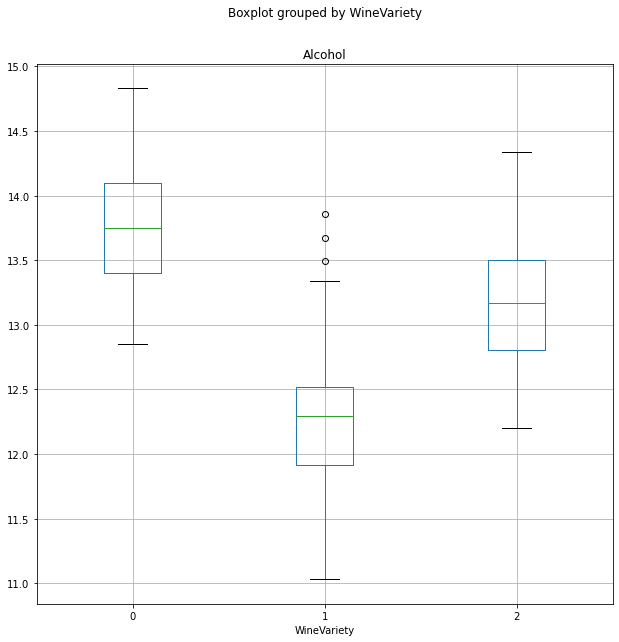

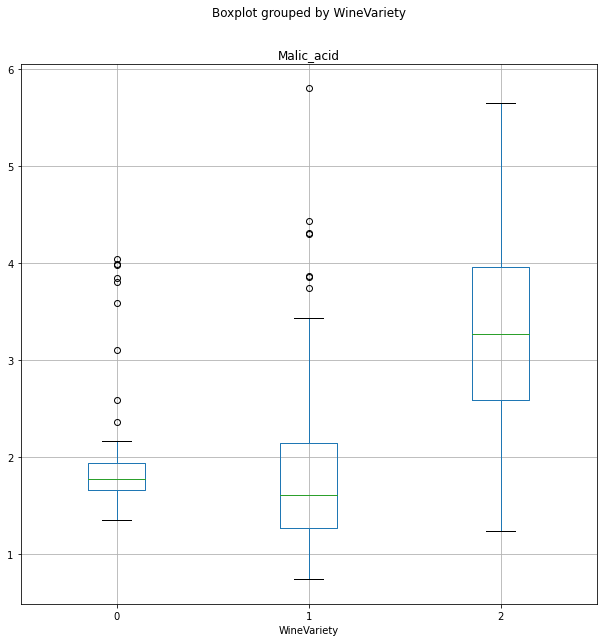

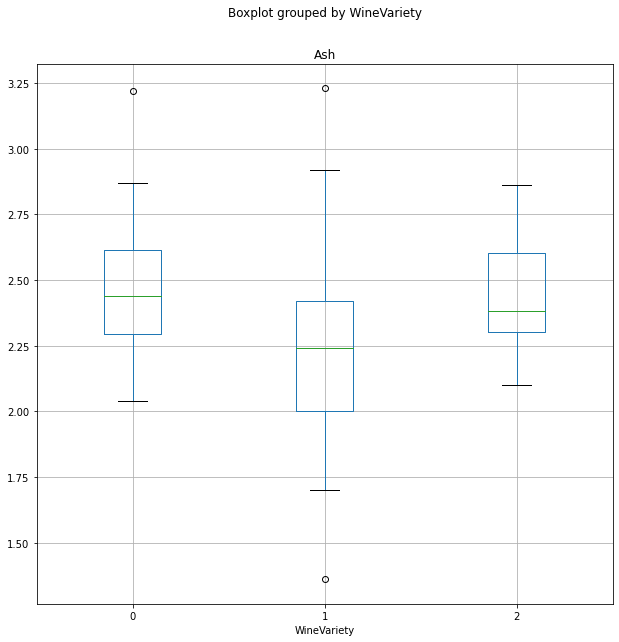

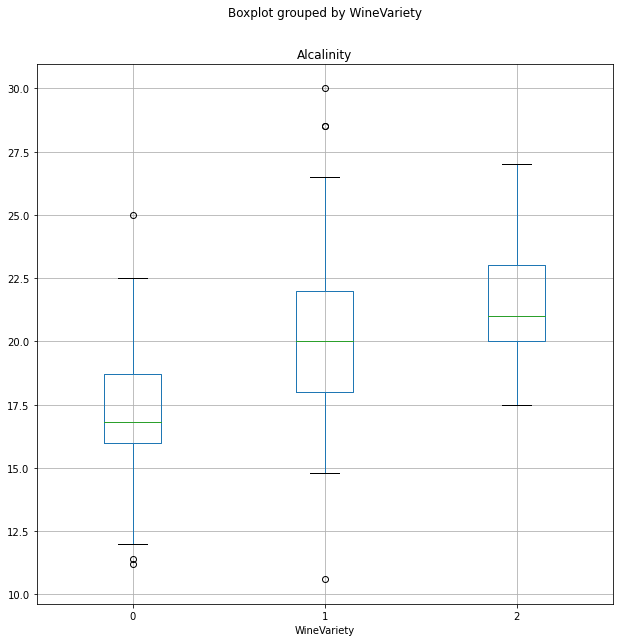

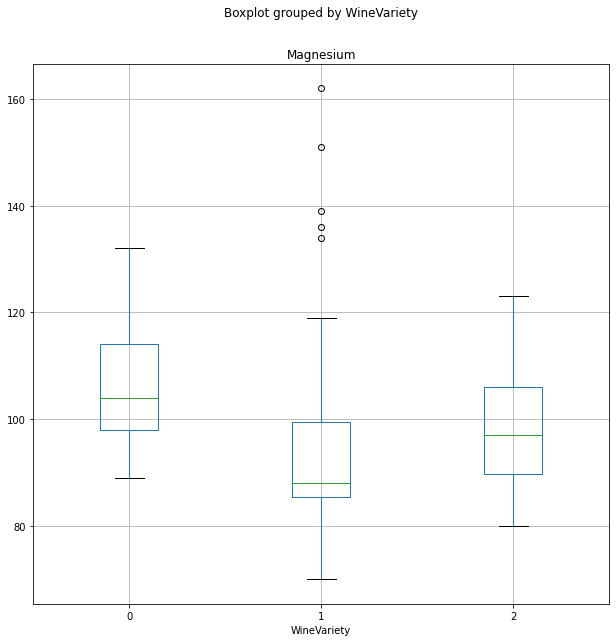

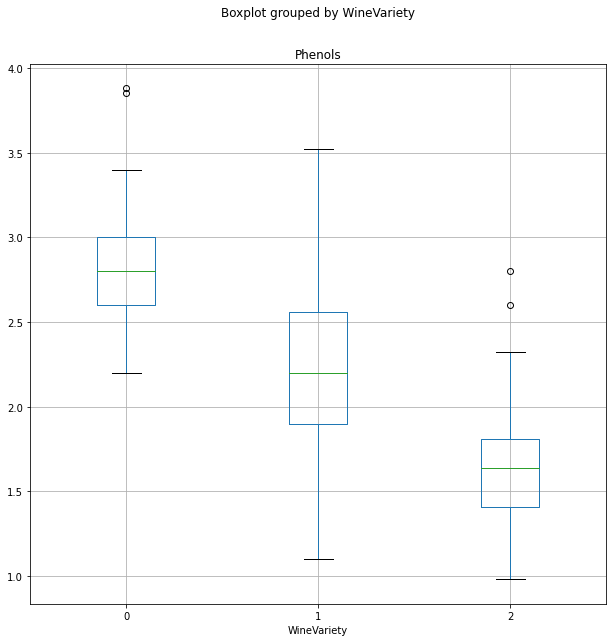

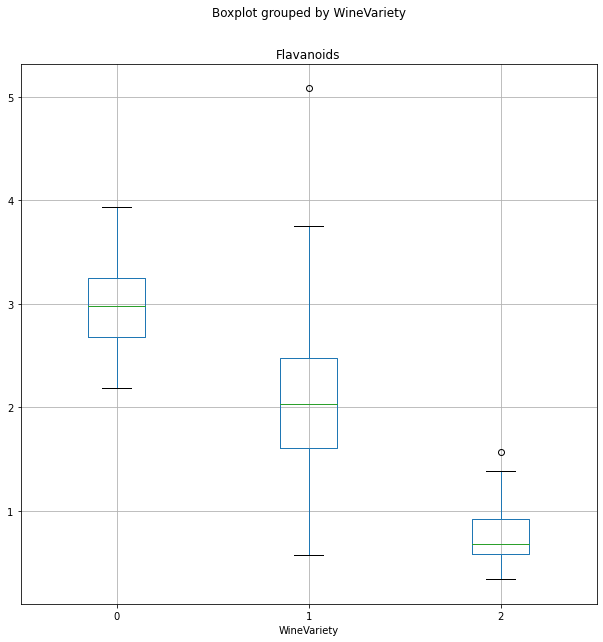

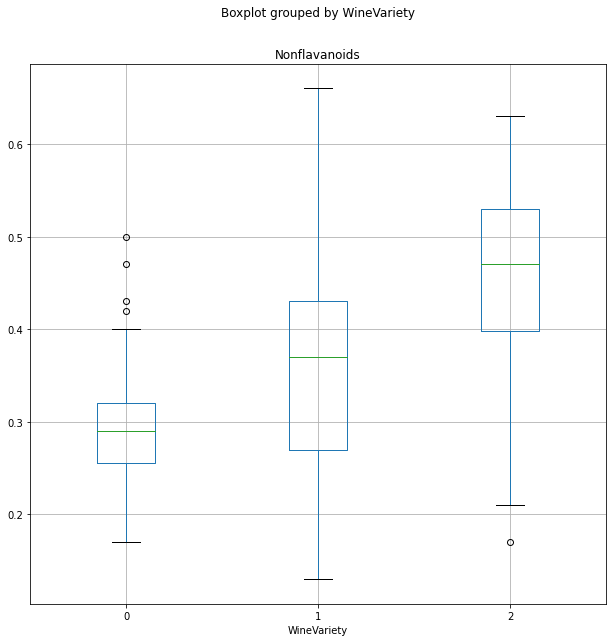

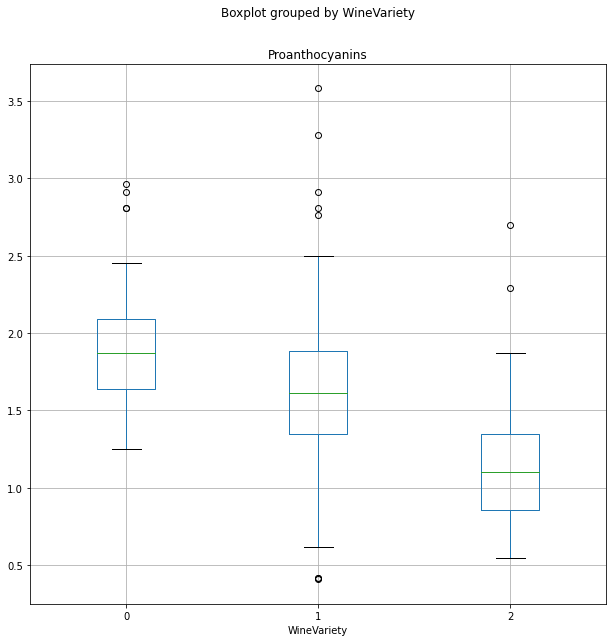

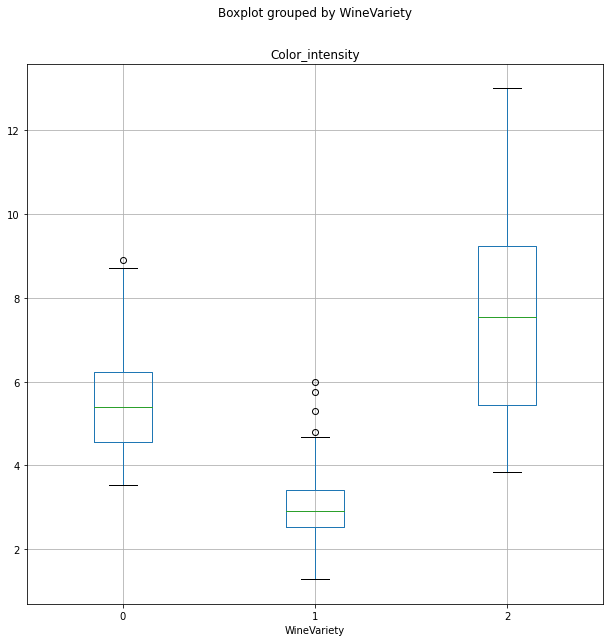

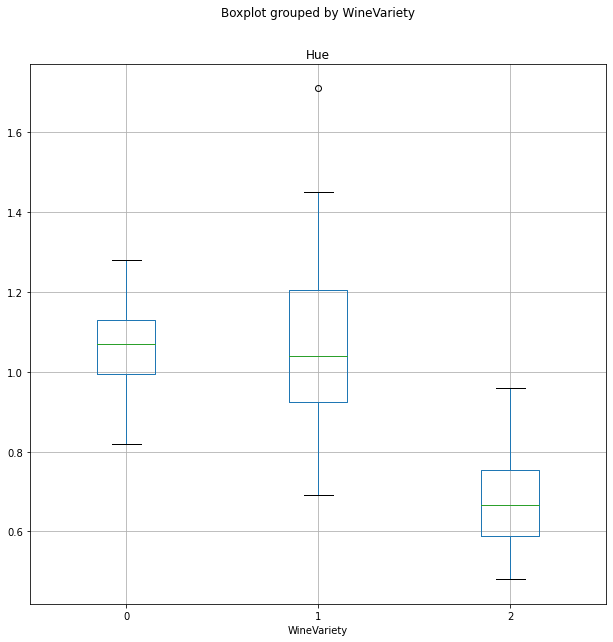

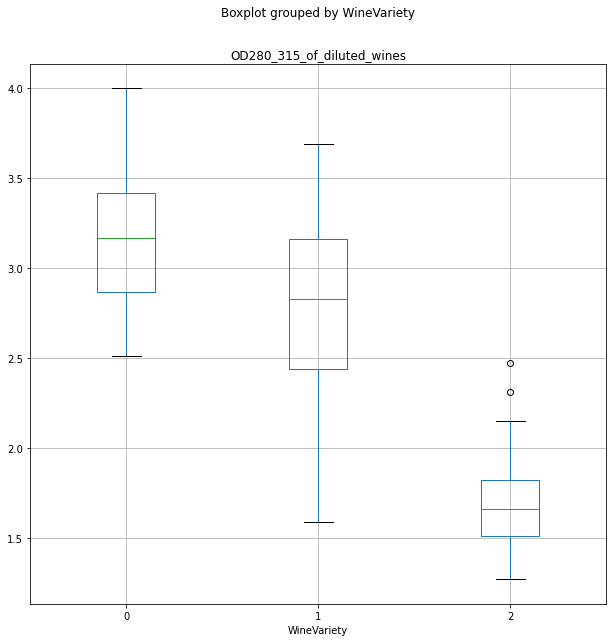

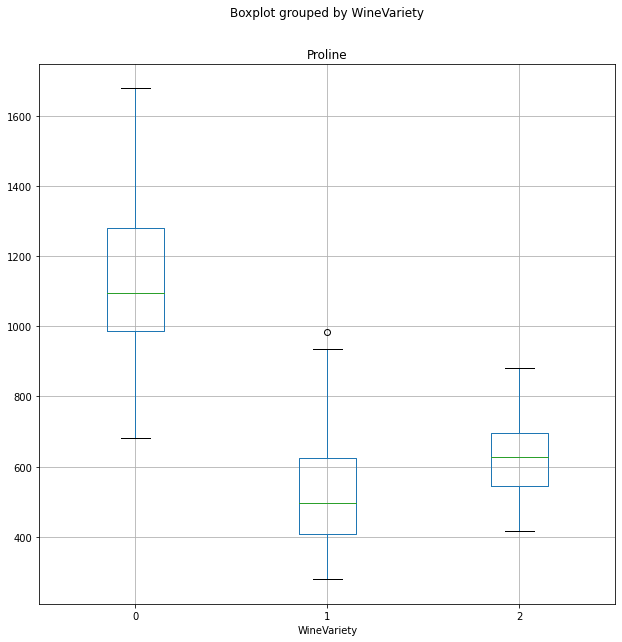

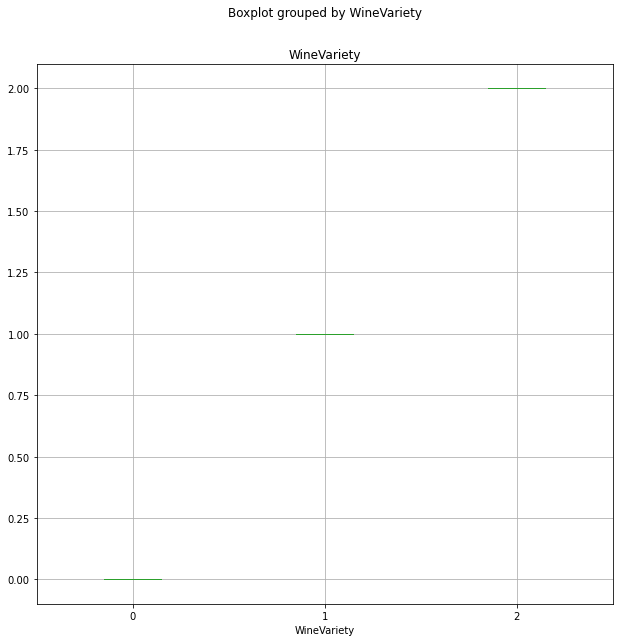

In [7]:

for col in wine.columns:
  wine.boxplot(by=label,column=col,figsize=(10,10))

In [8]:
from sklearn.model_selection import train_test_split
wine_features=wine.drop('WineVariety',axis=1)
# Separate features and labels
x, y = wine_features, wine[label]
# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
print ('Training Set: %d, Test Set: %d \n' % (x_train.shape[0], x_test.shape[0]))

Training Set: 124, Test Set: 54 



In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Define preprocessing for numeric columns (scale them)
feature_columns = [0,1,2,3,4,5,6,7,8,9,10,11,12]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LogisticRegression(solver='sag', multi_class='auto'))])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(x_train, y_train)
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12])])),
                ('regressor', LogisticRegression(solver='sag'))])


In [10]:
pred = model.predict(x_test)
print('Predicted labels: ', pred[:15])
print('actual labels:    ',y_test[:15].values)

Predicted labels:  [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2]
actual labels:     [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2]


In [11]:
from sklearn. metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_test, pred))
print("Overall Precision:",precision_score(y_test, pred, average='macro'))
print("Overall Recall:",recall_score(y_test, pred, average='macro'))

Overall Accuracy: 1.0
Overall Precision: 1.0
Overall Recall: 1.0


In [13]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_test, pred)
print(mcm)

[[19  0  0]
 [ 0 22  0]
 [ 0  0 13]]


[Text(33.0, 0.5, 'Actual'), Text(0.5, 15.0, 'Predicted')]

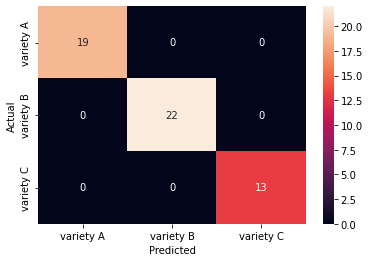

In [20]:
wine_classes=['variety A','variety B','variety C']
s=sns.heatmap(mcm,annot=True,xticklabels=wine_classes,yticklabels=wine_classes)
s.set(ylabel='Actual',xlabel='Predicted')

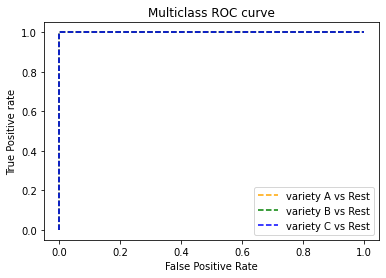

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Get class probability scores
wine_prob = model.predict_proba(x_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(wine_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, wine_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=wine_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=wine_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=wine_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [16]:
auc = roc_auc_score(y_test,wine_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 1.0


In [22]:
x_val=[[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]]
preds=model.predict(x_val)
print('1st set prediction: ',wine_classes[preds[0]], ' 2nd set prediction: ',wine_classes[preds[1]])

1st set prediction:  variety A  2nd set prediction:  variety B


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
